In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('data/SaleStackedArea_Data.csv', index_col=0)
df.index = [datetime.strptime(d, '%Y/%m/%d').date() for d in df.index]

Sum_df = df.apply(lambda x: x.sum(), axis=0).sort_values(ascending=False)
df = df[Sum_df.index]
columns = df.columns
colors = sns.husl_palette(len(columns), h=15 / 360, l=.65, s=1).as_hex()

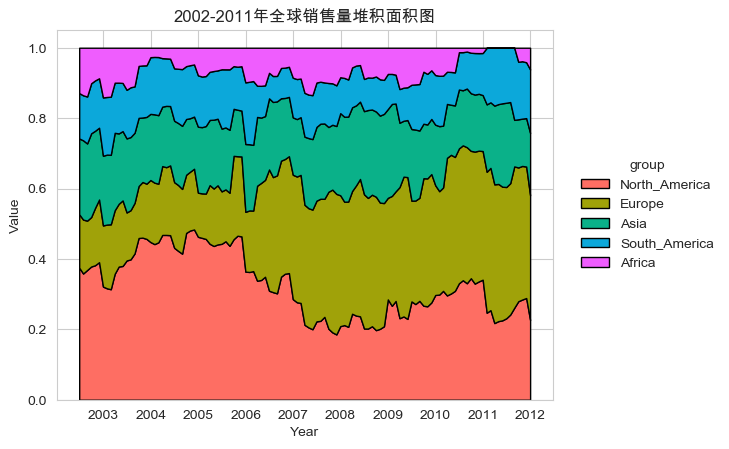

In [18]:
fig = plt.figure()
plt.stackplot(df.index.values,
              df.values.T, alpha=1, labels=columns, linewidth=1, edgecolor='k', colors=colors)
plt.title('2002-2011年全球销售量堆积面积图')
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(title="group", loc="center right", bbox_to_anchor=(1.35, 0, 0, 1), edgecolor='none', facecolor='none')
plt.show()

In [13]:
SumRow_df = df.apply(lambda x: x.sum(), axis=1)
df = df.apply(lambda x: x / SumRow_df, axis=0)
meanCol_df = df.apply(lambda x: x.mean(), axis=0).sort_values(ascending=False)
df = df[meanCol_df.index]
columns = df.columns

colors = sns.husl_palette(len(columns), h=15 / 360, l=.65, s=1).as_hex()

/var/folders/dp/wdk87p0d3ml1ysm634x3wlf80000gn/T/ipykernel_21858/1469856179.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])


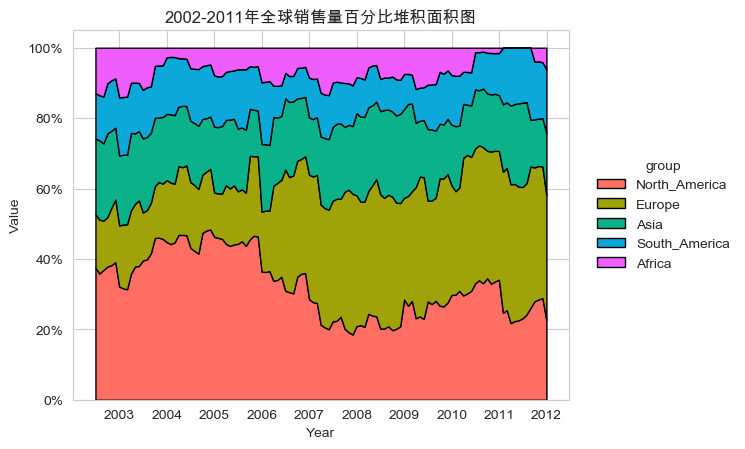

In [22]:
plt.stackplot(df.index.values, df.values.T, labels=columns, colors=colors,
              linewidth=1, edgecolor='k')

plt.title('2002-2011年全球销售量百分比堆积面积图')
plt.xlabel("Year")
plt.ylabel("Value")
plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])
plt.legend(title="group", loc="center right", bbox_to_anchor=(1.35, 0, 0, 1), edgecolor='none', facecolor='none')
plt.show()